### **LUT**

* 如果查找表是单通道，则输入图像每个通道都按照一个LUT进行映射
* 如果查找表是多通道，则输入图像第i个通道和第i个通道的LUT进行映射
* 灰度图是单通道，只按照单通道的查找表映射

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt

rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
# LUT第一层
LUT_1 = np.zeros(256, dtype='uint8')
LUT_1[101: 201] = 100
LUT_1[201:] = 255
# LUT第二层
LUT_2 = np.zeros(256, dtype='uint8')
LUT_2[101: 151] = 100
LUT_2[151: 201] = 150
LUT_2[201:] = 255
# LUT第三层
LUT_3 = np.zeros(256, dtype='uint8')
LUT_3[0: 101] = 100
LUT_3[101: 201] = 200
LUT_3[201:] = 255

In [3]:
# 合并三通道
LUT = cv.merge((LUT_1, LUT_2, LUT_3))
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'lena.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read lena.jpg')
    sys.exit

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
out0 = cv.LUT(img, LUT_1)
out1 = cv.LUT(gray, LUT_1)
out2 = cv.LUT(img, LUT)

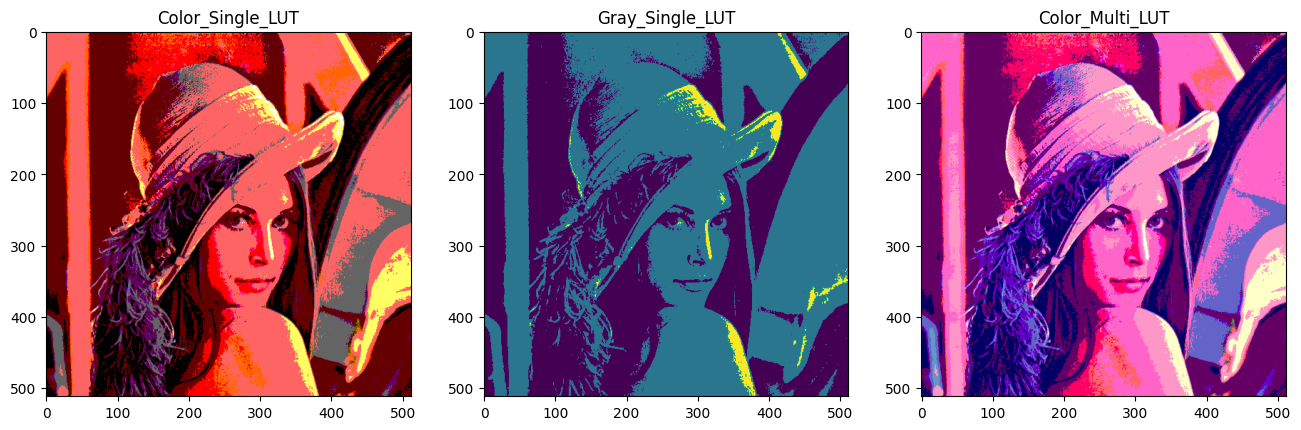

In [5]:
# 展示结果
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.title('Color_Single_LUT')
plt.imshow(out0)
plt.subplot(1, 3, 2)
plt.title('Gray_Single_LUT')
plt.imshow(out1)
plt.subplot(1, 3, 3)
plt.title('Color_Multi_LUT')
plt.imshow(out2)